#**Early Dropout Detection Using Personalized Learning Data**
In this notebook, we‚Äôll explore a personalized learning dataset (sourced from Kaggle) to build an early dropout detection system. The workflow will include:

- Data Import and Preprocessing: Handling missing values, encoding categorical data, and normalizing features.

- Exploratory Data Analysis (EDA): Understanding data distributions, identifying key patterns, and visualizing relationships that may influence dropout rates.

- Model Building: Applying a suitable machine learning model to predict the likelihood of a student dropping out based on personalized learning behaviors. The models that we used are Logistic Regression, Random Forest, Gradient Boosting, and CatBoost Classifier

- Model Evaluation: Assessing model performance using metrics like accuracy, precision, recall, and F1-score.

The objective is to create an interpretable and effective predictive model that can help proactively identify students at risk of leaving their courses.

# 1.0 Install and Import Libraries

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
import pickle

# 2.0 Data Loading

In [ ]:
#df = pd.read_csv('/content/personalized_learning_dataset.csv')
#update code to import Kaggle data into Colab
#https://drive.google.com/file/d/1NVquw57ja4zLtCZvk25k4eFrz6laU-Qy/view?usp=sharing

!pip install -q gdown

file_id = '1NVquw57ja4zLtCZvk25k4eFrz6laU-Qy'
output_file = 'personalized_learning_dataset.csv'

!gdown --id {file_id} -O {output_file}
print("Download complete.")

df = pd.read_csv(output_file)

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NVquw57ja4zLtCZvk25k4eFrz6laU-Qy
To: /content/personalized_learning_dataset.csv
100% 837k/837k [00:00<00:00, 27.0MB/s]
Download complete.


In [ ]:
# Summary of Dataset
print('Shape of Dataset: ', df.shape)
df.info()

Shape of Dataset:  (10000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score  

In [ ]:
#Read the first five rows of the dataset
df.head()

Student_ID  Age  Gender Education_Level       Course_Name  \
0     S00001   15  Female     High School  Machine Learning   
1     S00002   49    Male   Undergraduate     Python Basics   
2     S00003   20  Female   Undergraduate     Python Basics   
3     S00004   37  Female   Undergraduate      Data Science   
4     S00005   34  Female    Postgraduate     Python Basics   

   Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0                   171              4           67                    2   
1                   156              4           64                    0   
2                   217              2           55                    2   
3                   489              1           65                   43   
4                   496              3           59                   34   

   Assignment_Completion_Rate Engagement_Level  Final_Exam_Score  \
0                          89           Medium                51   
1                          94           Medium                92   
2                          67           Medium                45   
3                          60             High                59   
4                          88           Medium                93   

    Learning_Style  Feedback_Score Dropout_Likelihood  
0           Visual               1                 No  
1  Reading/Writing               5                 No  
2  Reading/Writing               1                 No  
3           Visual               4                 No  
4           Visual               3                 No

In [ ]:
#Read the last five rows of the dataset
df.tail()

Student_ID  Age  Gender Education_Level       Course_Name  \
9995     S09996   26  Female   Undergraduate  Machine Learning   
9996     S09997   37    Male    Postgraduate  Machine Learning   
9997     S09998   40  Female    Postgraduate  Machine Learning   
9998     S09999   44    Male     High School     Python Basics   
9999     S10000   39  Female   Undergraduate  Machine Learning   

      Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  Forum_Participation  \
9995                   162              2           87                   27   
9996                   447              2           39                   10   
9997                   105              4           50                   23   
9998                   245              2           84                   39   
9999                   171              2           88                    8   

      Assignment_Completion_Rate Engagement_Level  Final_Exam_Score  \
9995                          73           Medium                68   
9996                          68           Medium                46   
9997                          41             High                64   
9998                          85           Medium                38   
9999                          69           Medium                97   

       Learning_Style  Feedback_Score Dropout_Likelihood  
9995      Kinesthetic               2                 No  
9996  Reading/Writing               1                Yes  
9997           Visual               1                 No  
9998           Visual               2                 No  
9999           Visual               2                 No

In [ ]:
#Descriptive Statistics - Categorical Variable
summary_categorical = df.describe(include=['object'])
summary_categorical.loc['missing'] = df.isnull().sum()
summary_categorical


Student_ID  Gender Education_Level       Course_Name Engagement_Level  \
count        10000   10000           10000             10000            10000   
unique       10000       3               3                 5                3   
top         S09984  Female   Undergraduate  Machine Learning           Medium   
freq             1    4886            5070              2043             4927   
missing          0       0               0                 0                0   

          Learning_Style Dropout_Likelihood  
count              10000              10000  
unique                 4                  2  
top      Reading/Writing                 No  
freq                2554               8043  
missing                0                  0

In [ ]:
#Descriptive Statistics (Numeric Variable)
summary_numeric=df.describe()
summary_numeric.loc['missing'] = df.isnull().sum()
summary_numeric

Age  Time_Spent_on_Videos  Quiz_Attempts   Quiz_Scores  \
count    10000.000000          10000.000000   10000.000000  10000.000000   
mean        32.137700            255.375400       2.500500     64.578600   
std         10.062647            141.656392       1.122642     20.289125   
min         15.000000             10.000000       1.000000     30.000000   
25%         24.000000            131.000000       1.000000     47.000000   
50%         32.000000            257.000000       3.000000     65.000000   
75%         41.000000            378.000000       4.000000     82.000000   
max         49.000000            499.000000       4.000000     99.000000   
missing      0.000000              0.000000       0.000000      0.000000   

         Forum_Participation  Assignment_Completion_Rate  Final_Exam_Score  \
count           10000.000000                10000.000000      10000.000000   
mean               24.616200                   69.546800         64.697000   
std                14.330305                   17.360782         20.096417   
min                 0.000000                   40.000000         30.000000   
25%                12.000000                   54.000000         47.000000   
50%                25.000000                   69.000000         65.000000   
75%                37.000000                   85.000000         82.000000   
max                49.000000                   99.000000         99.000000   
missing             0.000000                    0.000000          0.000000   

         Feedback_Score  
count      10000.000000  
mean           3.012600  
std            1.421423  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000  
missing        0.000000

# 2.0 Data Cleaning

In [ ]:
# Checking for missing values within data
df.isnull().sum()

Student_ID                    0
Age                           0
Gender                        0
Education_Level               0
Course_Name                   0
Time_Spent_on_Videos          0
Quiz_Attempts                 0
Quiz_Scores                   0
Forum_Participation           0
Assignment_Completion_Rate    0
Engagement_Level              0
Final_Exam_Score              0
Learning_Style                0
Feedback_Score                0
Dropout_Likelihood            0
dtype: int64

In [ ]:
#Checking Skewness of Numerical Data
df.skew(numeric_only=True).sort_values(ascending=False)

Assignment_Completion_Rate    0.013916
Final_Exam_Score             -0.003571
Quiz_Attempts                -0.007399
Feedback_Score               -0.009044
Quiz_Scores                  -0.009049
Forum_Participation          -0.014128
Time_Spent_on_Videos         -0.018043
Age                          -0.023052
dtype: float64

In [ ]:
#Checking for duplicates within data
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
#Checking for outliers within data using IQR method

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Store results
outlier_summary = {}

# Loop through columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

# Convert to DataFrame for readability
outlier_counts = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_counts = outlier_counts.sort_values(by='Outlier Count', ascending=False)
outlier_counts

Outlier Count
Age                                     0
Time_Spent_on_Videos                    0
Quiz_Attempts                           0
Quiz_Scores                             0
Forum_Participation                     0
Assignment_Completion_Rate              0
Final_Exam_Score                        0
Feedback_Score                          0

In [ ]:
#To perform category consolidation/reduction on the 'Gender' column
#Merge the 'Other' into the mode of the 'Gender' column

#Replacing 'Other' values to NaN
df.loc[df['Gender'] == 'Other', 'Gender'] = np.nan

#Imputing the NaN values to the mode of the column
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

<ipython-input-13-3718474876>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [ ]:
#Drop 'Student_ID' column
df=df.drop(['Student_ID'],axis=1)

In [ ]:
# Resampling Age Distributions based on Education Levels
mask_high_school = (df["Education_Level"] == "High School") & (df["Age"] > 17)
mask_undergraduate = (df["Education_Level"] == "Undergraduate") & (df["Age"] < 18)
mask_postgraduate = (df["Education_Level"] == "Postgraduate") & (df["Age"] < 18)

# Generate random ages between 13 and 17 (inclusive) for those high school records
df.loc[mask_high_school, "Age"] = np.random.randint(13, 18, size=mask_high_school.sum())

# Generate random ages between 18 and 50 (inclusive) for Undergraduate records
df.loc[mask_undergraduate, "Age"] = np.random.randint(18, 50, size=mask_undergraduate.sum())

# Generate random ages between 18 and 50 (inclusive) for those Postgraduate records
df.loc[mask_postgraduate, "Age"] = np.random.randint(18, 50, size=mask_postgraduate.sum())


In [ ]:
#Final DataFrame after Data Cleaning
print("Shape of Dataset: ", df.shape)
df

Shape of Dataset:  (10000, 14)


Age  Gender Education_Level       Course_Name  Time_Spent_on_Videos  \
0      15  Female     High School  Machine Learning                   171   
1      49    Male   Undergraduate     Python Basics                   156   
2      20  Female   Undergraduate     Python Basics                   217   
3      37  Female   Undergraduate      Data Science                   489   
4      34  Female    Postgraduate     Python Basics                   496   
...   ...     ...             ...               ...                   ...   
9995   26  Female   Undergraduate  Machine Learning                   162   
9996   37    Male    Postgraduate  Machine Learning                   447   
9997   40  Female    Postgraduate  Machine Learning                   105   
9998   15    Male     High School     Python Basics                   245   
9999   39  Female   Undergraduate  Machine Learning                   171   

      Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0                 4           67                    2   
1                 4           64                    0   
2                 2           55                    2   
3                 1           65                   43   
4                 3           59                   34   
...             ...          ...                  ...   
9995              2           87                   27   
9996              2           39                   10   
9997              4           50                   23   
9998              2           84                   39   
9999              2           88                    8   

      Assignment_Completion_Rate Engagement_Level  Final_Exam_Score  \
0                             89           Medium                51   
1                             94           Medium                92   
2                             67           Medium                45   
3                             60             High                59   
4                             88           Medium                93   
...                          ...              ...               ...   
9995                          73           Medium                68   
9996                          68           Medium                46   
9997                          41             High                64   
9998                          85           Medium                38   
9999                          69           Medium                97   

       Learning_Style  Feedback_Score Dropout_Likelihood  
0              Visual               1                 No  
1     Reading/Writing               5                 No  
2     Reading/Writing               1                 No  
3              Visual               4                 No  
4              Visual               3                 No  
...               ...             ...                ...  
9995      Kinesthetic               2                 No  
9996  Reading/Writing               1                Yes  
9997           Visual               1                 No  
9998           Visual               2                 No  
9999           Visual               2                 No  

[10000 rows x 14 columns]

# 3.0 Data Exploration (EDA)

## 3.1 Univariate Analysis

<Axes: xlabel='Gender'>

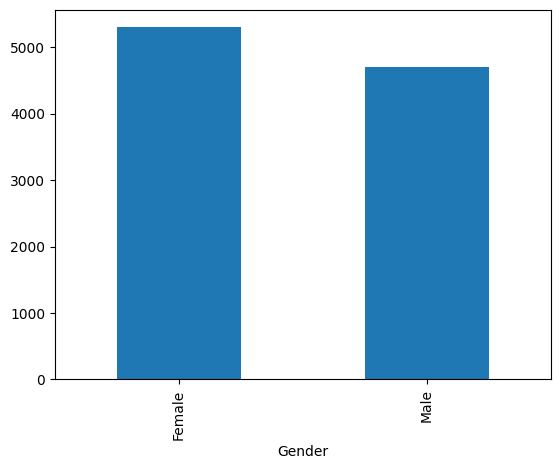

In [ ]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Learning_Style'>

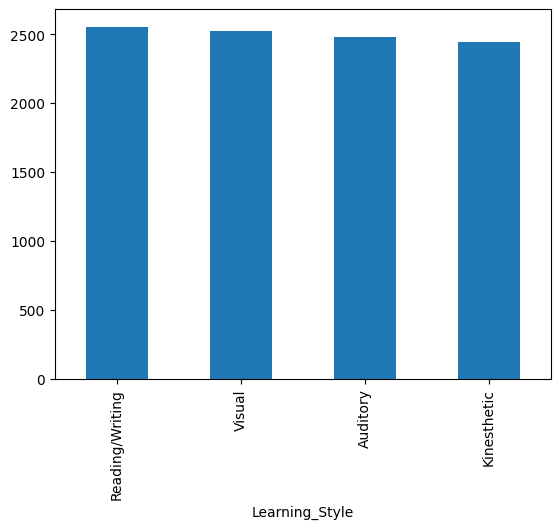

In [ ]:
df['Learning_Style'].value_counts().plot(kind='bar')

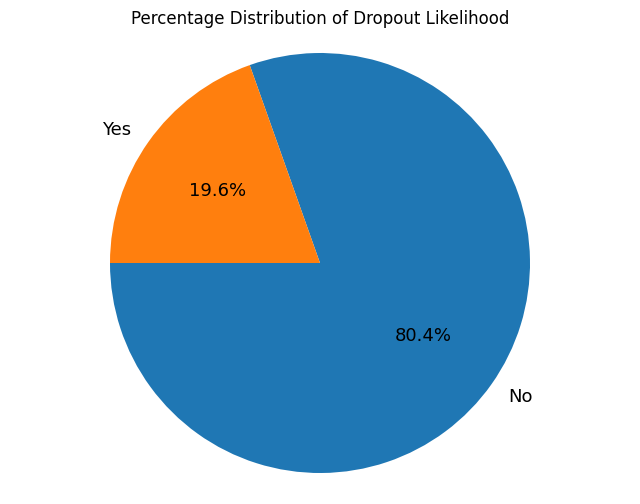

In [ ]:
# Calculate percentage for each category
DropoutLikelihood_counts = df['Dropout_Likelihood'].value_counts()
labels = DropoutLikelihood_counts.index
sizes = DropoutLikelihood_counts.values

# Plotting a pie chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, textprops={'fontsize': 13})
plt.title('Percentage Distribution of Dropout Likelihood')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

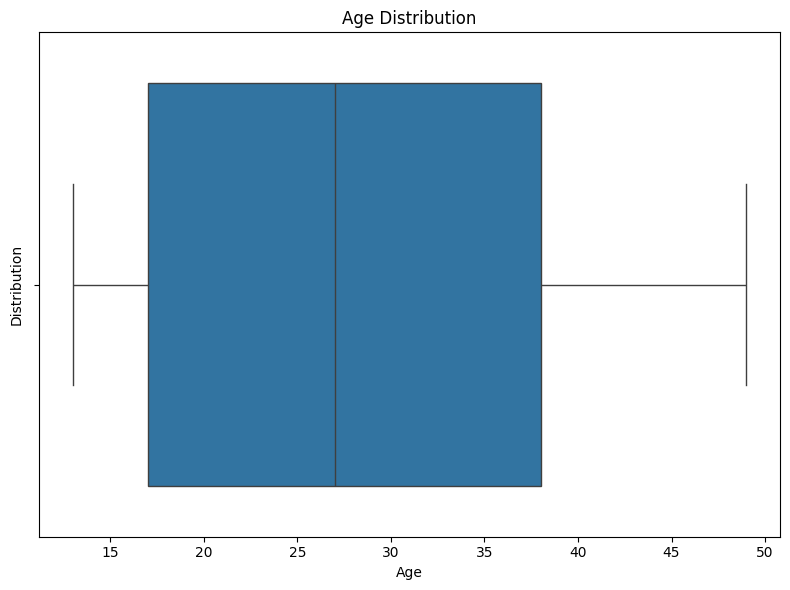

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.tight_layout()
plt.show()

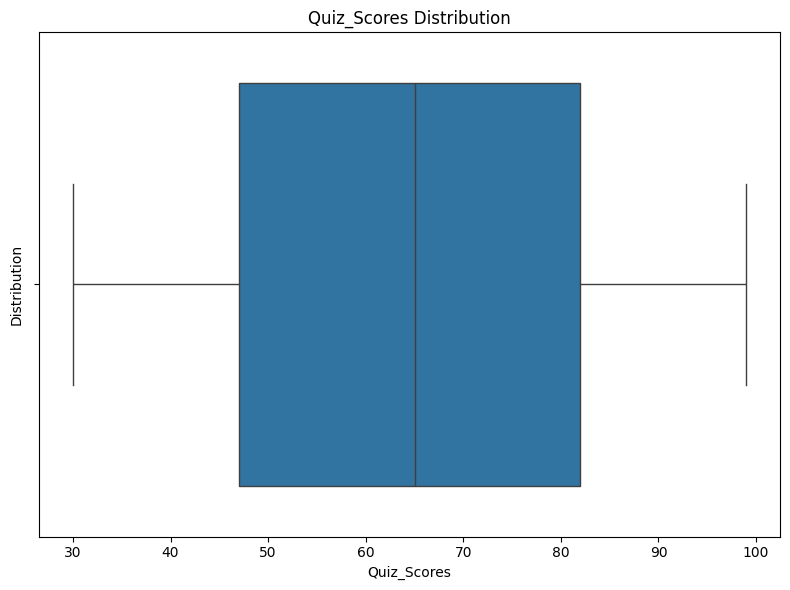

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Quiz_Scores')
plt.title('Quiz_Scores Distribution')
plt.xlabel('Quiz_Scores')
plt.ylabel('Distribution')
plt.tight_layout()
plt.show()

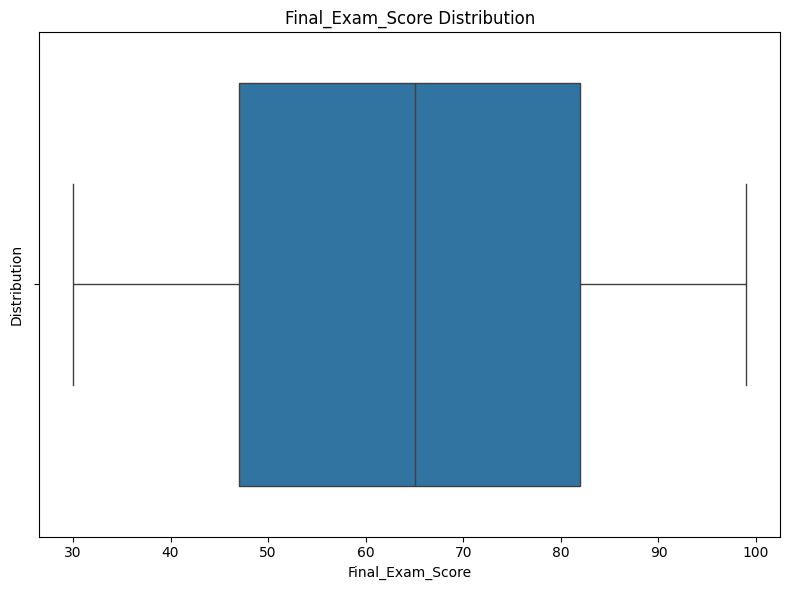

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Final_Exam_Score')
plt.title('Final_Exam_Score Distribution')
plt.xlabel('Final_Exam_Score')
plt.ylabel('Distribution')
plt.tight_layout()
plt.show()

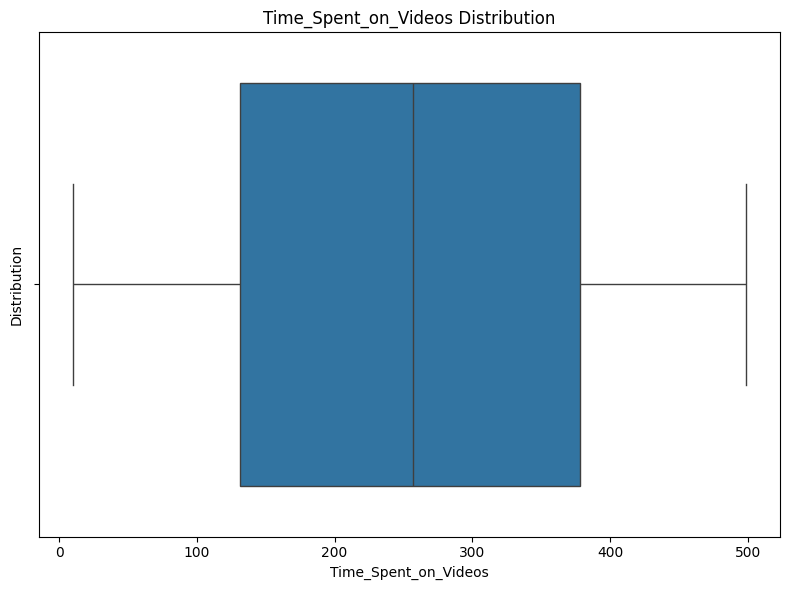

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Time_Spent_on_Videos')
plt.title('Time_Spent_on_Videos Distribution')
plt.xlabel('Time_Spent_on_Videos')
plt.ylabel('Distribution')
plt.tight_layout()
plt.show()

## 3.2 Bivariate Analysis

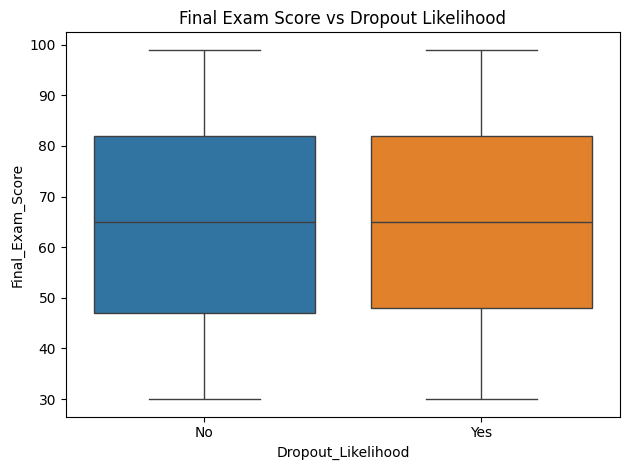

In [ ]:
sns.boxplot(data=df, x='Dropout_Likelihood', y='Final_Exam_Score', hue='Dropout_Likelihood')
plt.title('Final Exam Score vs Dropout Likelihood')
plt.tight_layout()
plt.show()

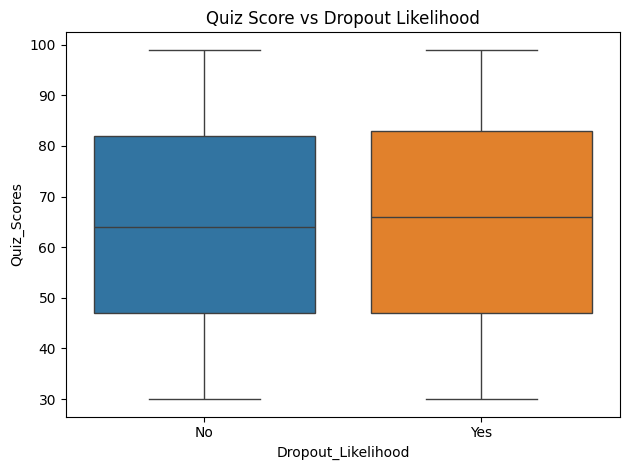

In [ ]:
sns.boxplot(data=df, x='Dropout_Likelihood', y='Quiz_Scores', hue='Dropout_Likelihood')
plt.title('Quiz Score vs Dropout Likelihood')
plt.tight_layout()
plt.show()

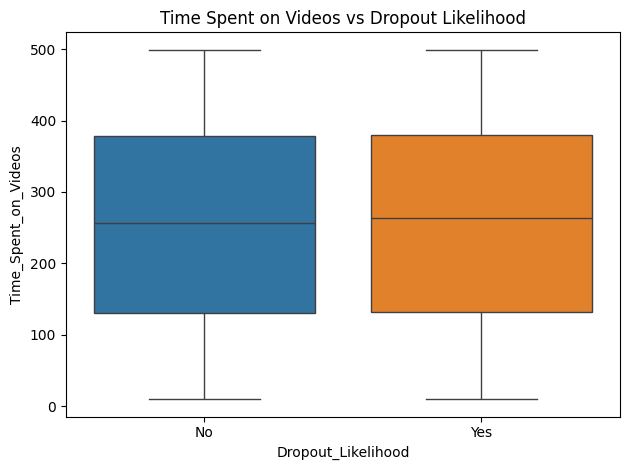

In [ ]:
sns.boxplot(data=df, x='Dropout_Likelihood', y='Time_Spent_on_Videos', hue='Dropout_Likelihood')
plt.title('Time Spent on Videos vs Dropout Likelihood')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gender vs Dropout Likelihood')

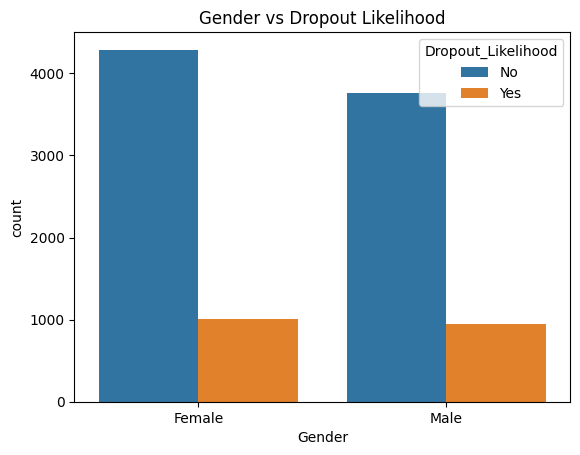

In [ ]:
sns.countplot(data=df, x='Gender', hue='Dropout_Likelihood')
plt.title('Gender vs Dropout Likelihood')

<Axes: xlabel='Education_Level'>

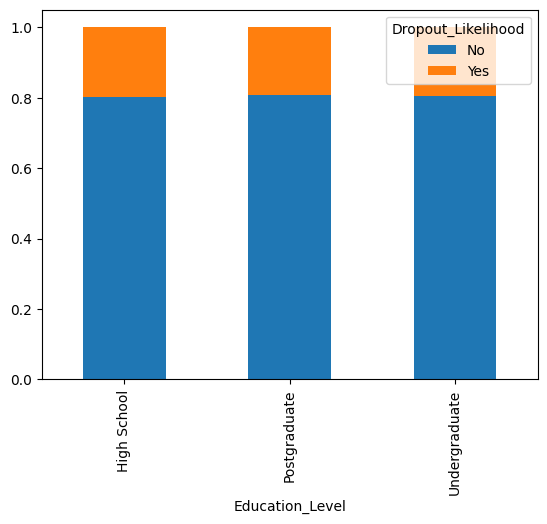

In [ ]:
pd.crosstab(df['Education_Level'], df['Dropout_Likelihood'], normalize='index').plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Gender vs Dropout Likelihood')

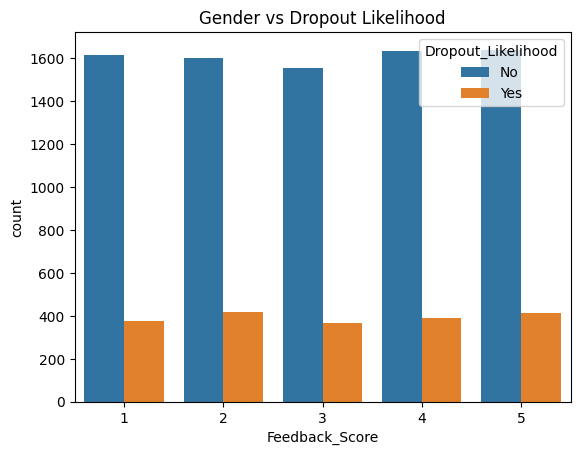

In [ ]:
sns.countplot(data=df, x='Feedback_Score', hue='Dropout_Likelihood')
plt.title('Gender vs Dropout Likelihood')

[Text(0.5, 1.0, 'Dropout Likelihood by Engagement Level')]

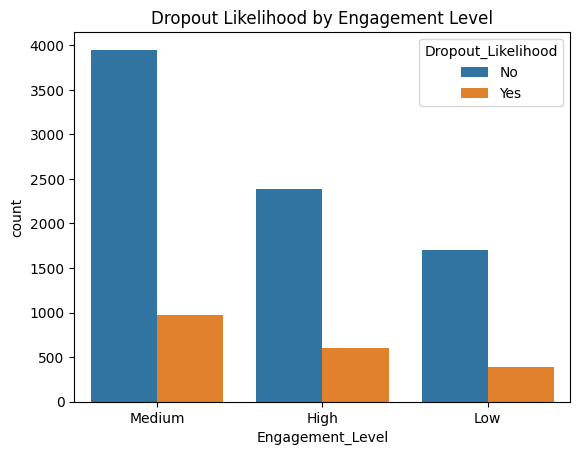

In [ ]:
sns.countplot(data=df, x="Engagement_Level", hue="Dropout_Likelihood").set(title='Dropout Likelihood by Engagement Level')

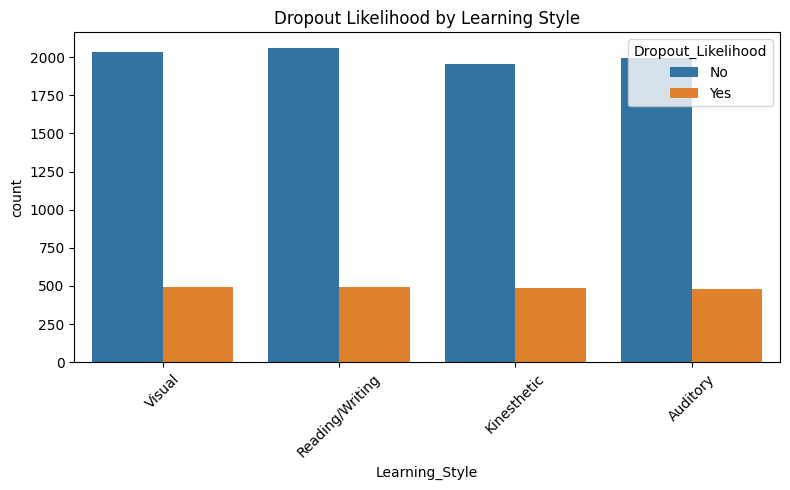

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Learning_Style', hue='Dropout_Likelihood')
plt.title('Dropout Likelihood by Learning Style')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['Age', 'Gender', 'Education_Level', 'Course_Name',
       'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores',
       'Forum_Participation', 'Assignment_Completion_Rate', 'Engagement_Level',
       'Final_Exam_Score', 'Learning_Style', 'Feedback_Score',
       'Dropout_Likelihood'],
      dtype='object')


## 3.3 Multivariate Analysis

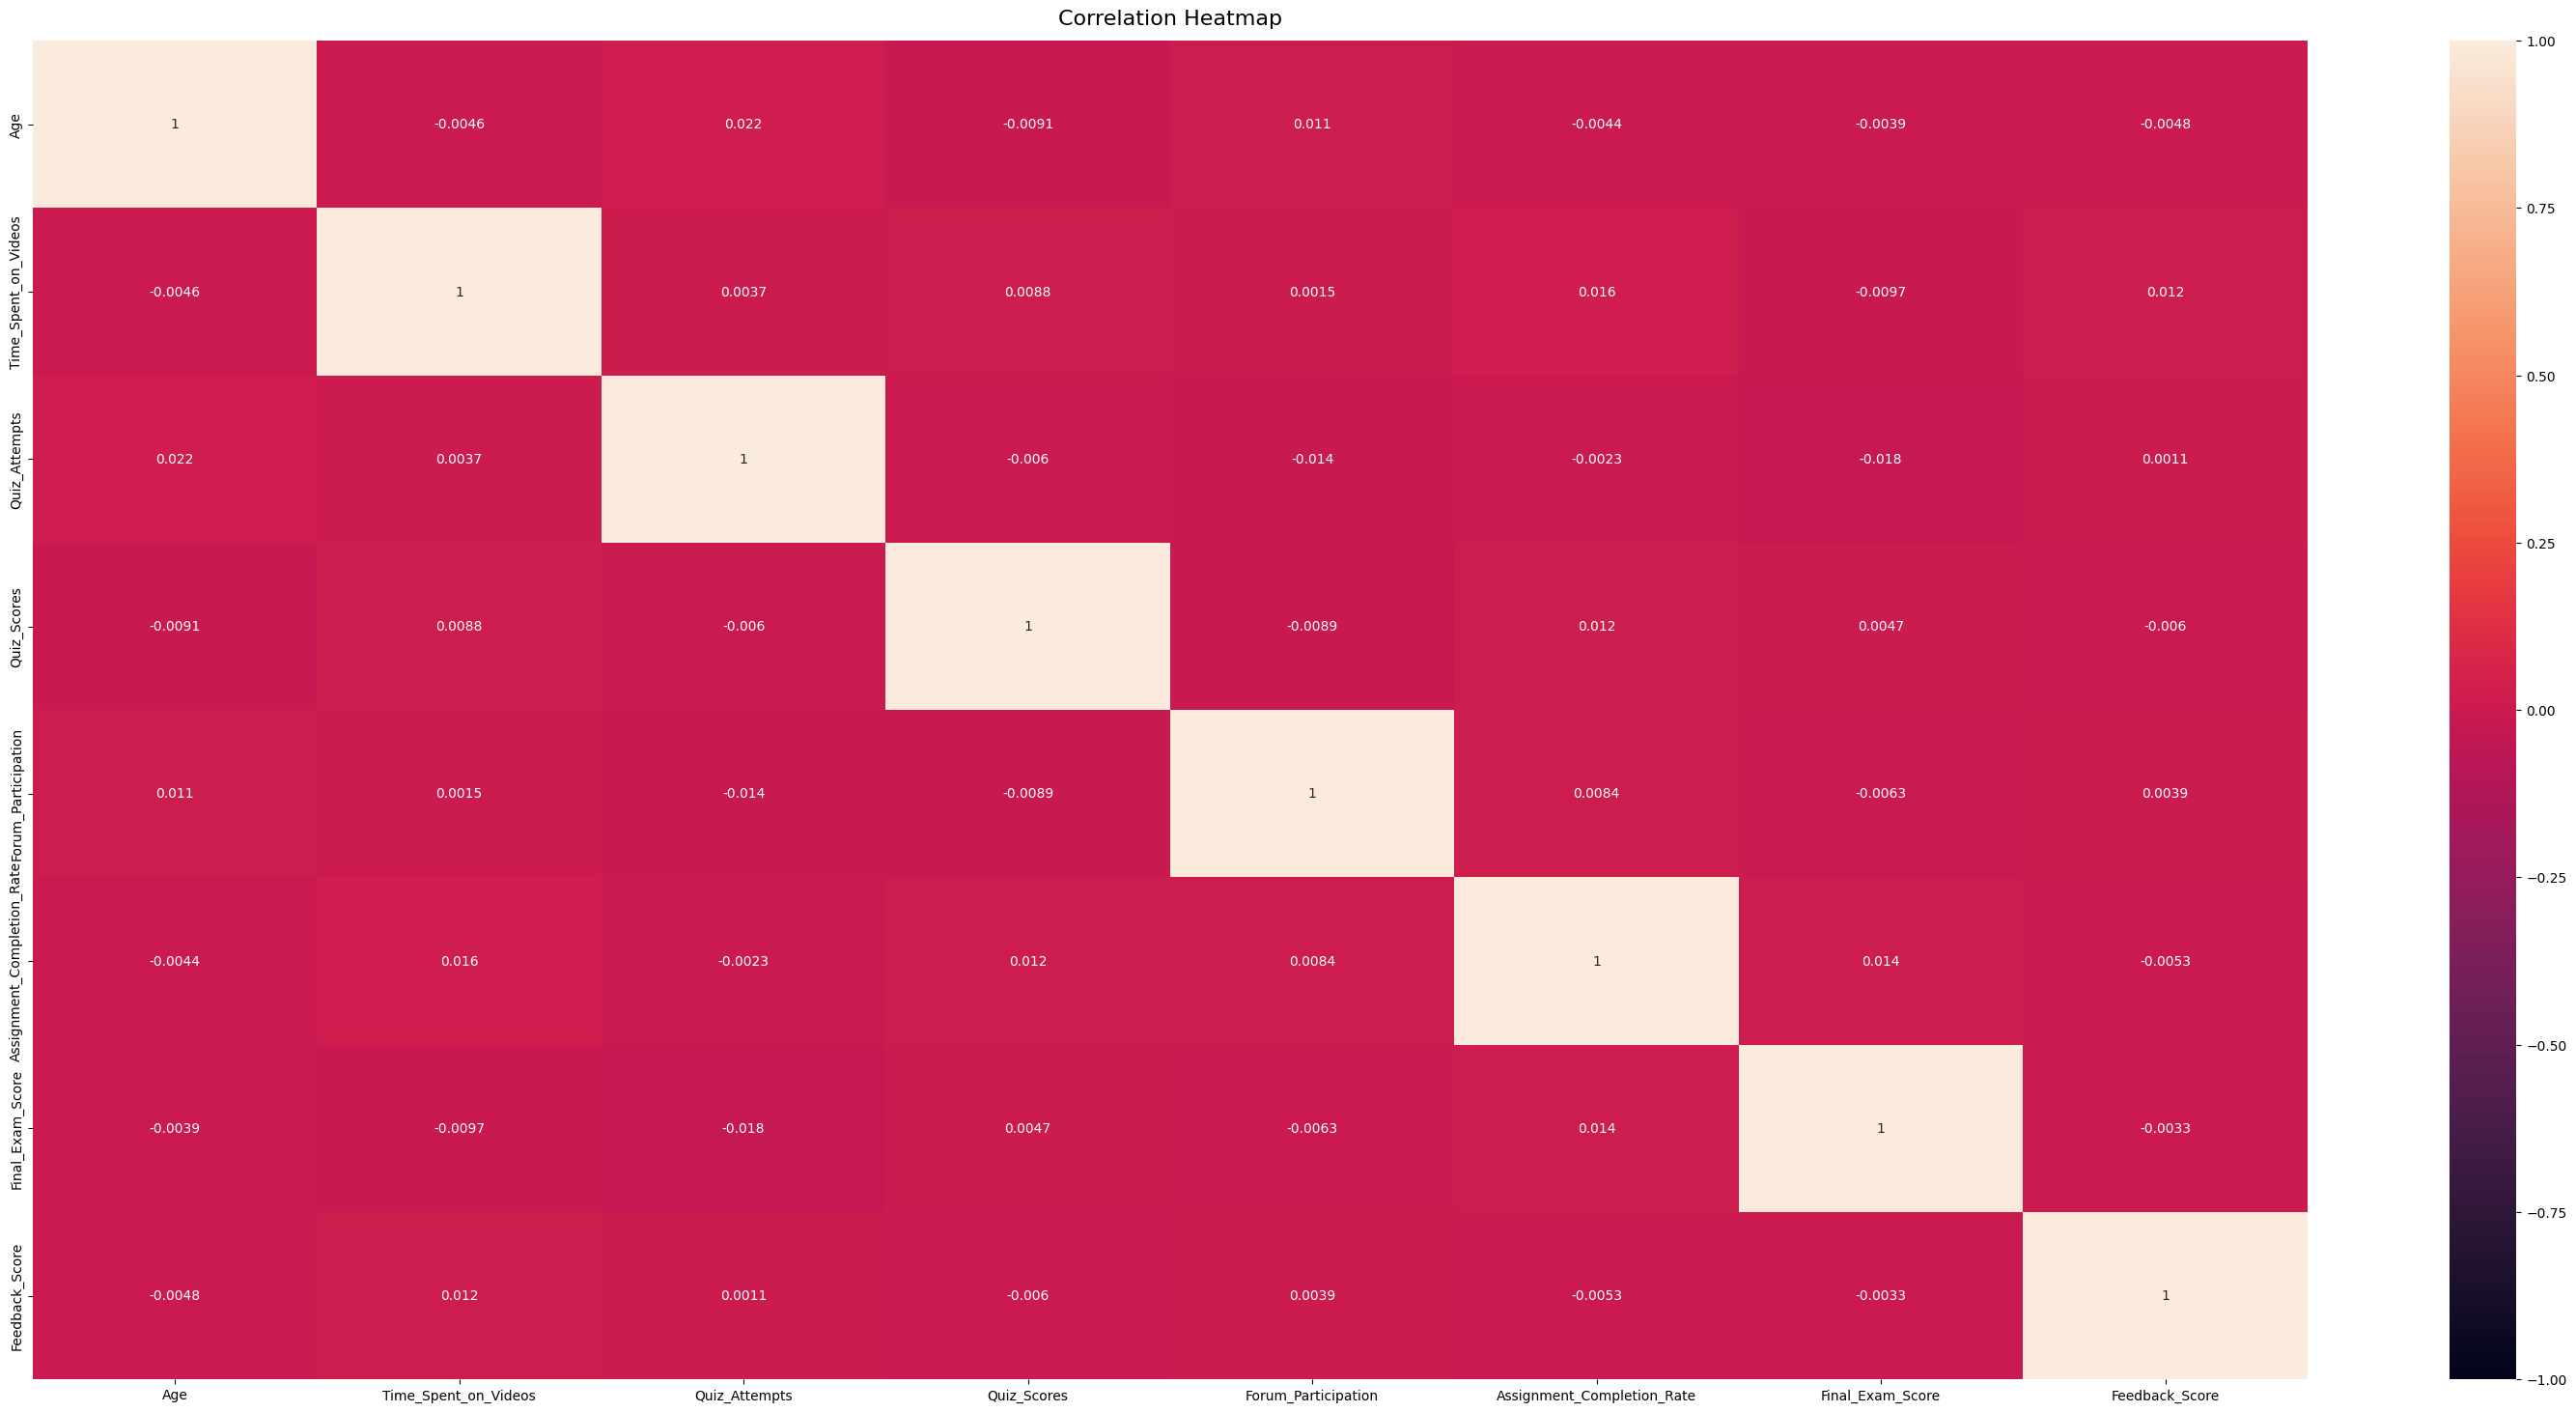

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(38, 18))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

# 4.0 Feature Engineering

In [ ]:
#Deriving New Features

# Avoid division by zero
df['Quiz_Efficiency'] = df['Quiz_Scores'] / df['Quiz_Attempts'].replace(0, np.nan)
df['High_Performer'] = df['Final_Exam_Score'] > 85.


# Activity level - average of forum, video time, and assignments
df['Activity_Level_Avg'] = (
    df['Time_Spent_on_Videos'] +
    df['Forum_Participation'] +
    df['Assignment_Completion_Rate']
) / 3


# Completion and performance ratio
df['Completion_Performance_Score'] = (
    df['Assignment_Completion_Rate'] / 100
) * (df['Quiz_Scores'] / 100)

df['Performance_Score'] = (
    (df['Assignment_Completion_Rate'] >= 90).astype(int) +
    (df['Quiz_Scores'] >= 80).astype(int) +
    (df['Final_Exam_Score'] >= 85).astype(int) +
    (df['Engagement_Level'] == 'High').astype(int) +
    (df['Feedback_Score'] >= 80).astype(int)
)

df['High_Performer'] = df['Performance_Score'] >= 4


# Learning efficiency (score relative to effort)
df['Learning_Efficiency'] = df['Final_Exam_Score'] / (
    df['Time_Spent_on_Videos'] + df['Quiz_Attempts'] + 1  # Avoid division by zero
)

# Binary Flags
df['Low_Assignment_Completion'] = df['Assignment_Completion_Rate'] < 50
df['Low_Quiz_Score'] = df['Quiz_Scores'] < 50
df['Low_Forum_Participation'] = df['Forum_Participation'] == 0
df['Low_Video_Watch_Time'] = df['Time_Spent_on_Videos'] < df['Time_Spent_on_Videos'].median()
df['Low_Final_Exam_Score'] = df['Final_Exam_Score'] < 50
df['Negative_Feedback'] = df['Feedback_Score'] < 3
df['Low_Engagement'] = df['Engagement_Level'] == 'Low'


# Age groups
df['Is_Young'] = df['Age'] < 25
df['Is_Senior'] = df['Age'] >= 40


#Composite Risk Score
df['Dropout_Risk_Score'] = (
    df['Low_Assignment_Completion'].astype(int) +
    df['Low_Quiz_Score'].astype(int) +
    df['Low_Forum_Participation'].astype(int) +
    df['Low_Final_Exam_Score'].astype(int) +
    df['Negative_Feedback'].astype(int)
)


In [ ]:
## One-Hot Encoding for Categorical Fields
one_hot_cols = ['Gender', 'Course_Name', 'Learning_Style']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


## Ordinal Encoding for Ordinal Fields
ordinal_cols = ['Education_Level', 'Engagement_Level']
ordinal_mappings = {
    'Education_Level': ['High School', 'Undergraduate', 'Postgraduate'],
    'Engagement_Level': ['Low', 'Medium', 'High']
}

ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols])
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])


## Label Encoding for Target Fields
label_encoder = LabelEncoder()
df['Dropout_Likelihood'] = label_encoder.fit_transform(df['Dropout_Likelihood'])

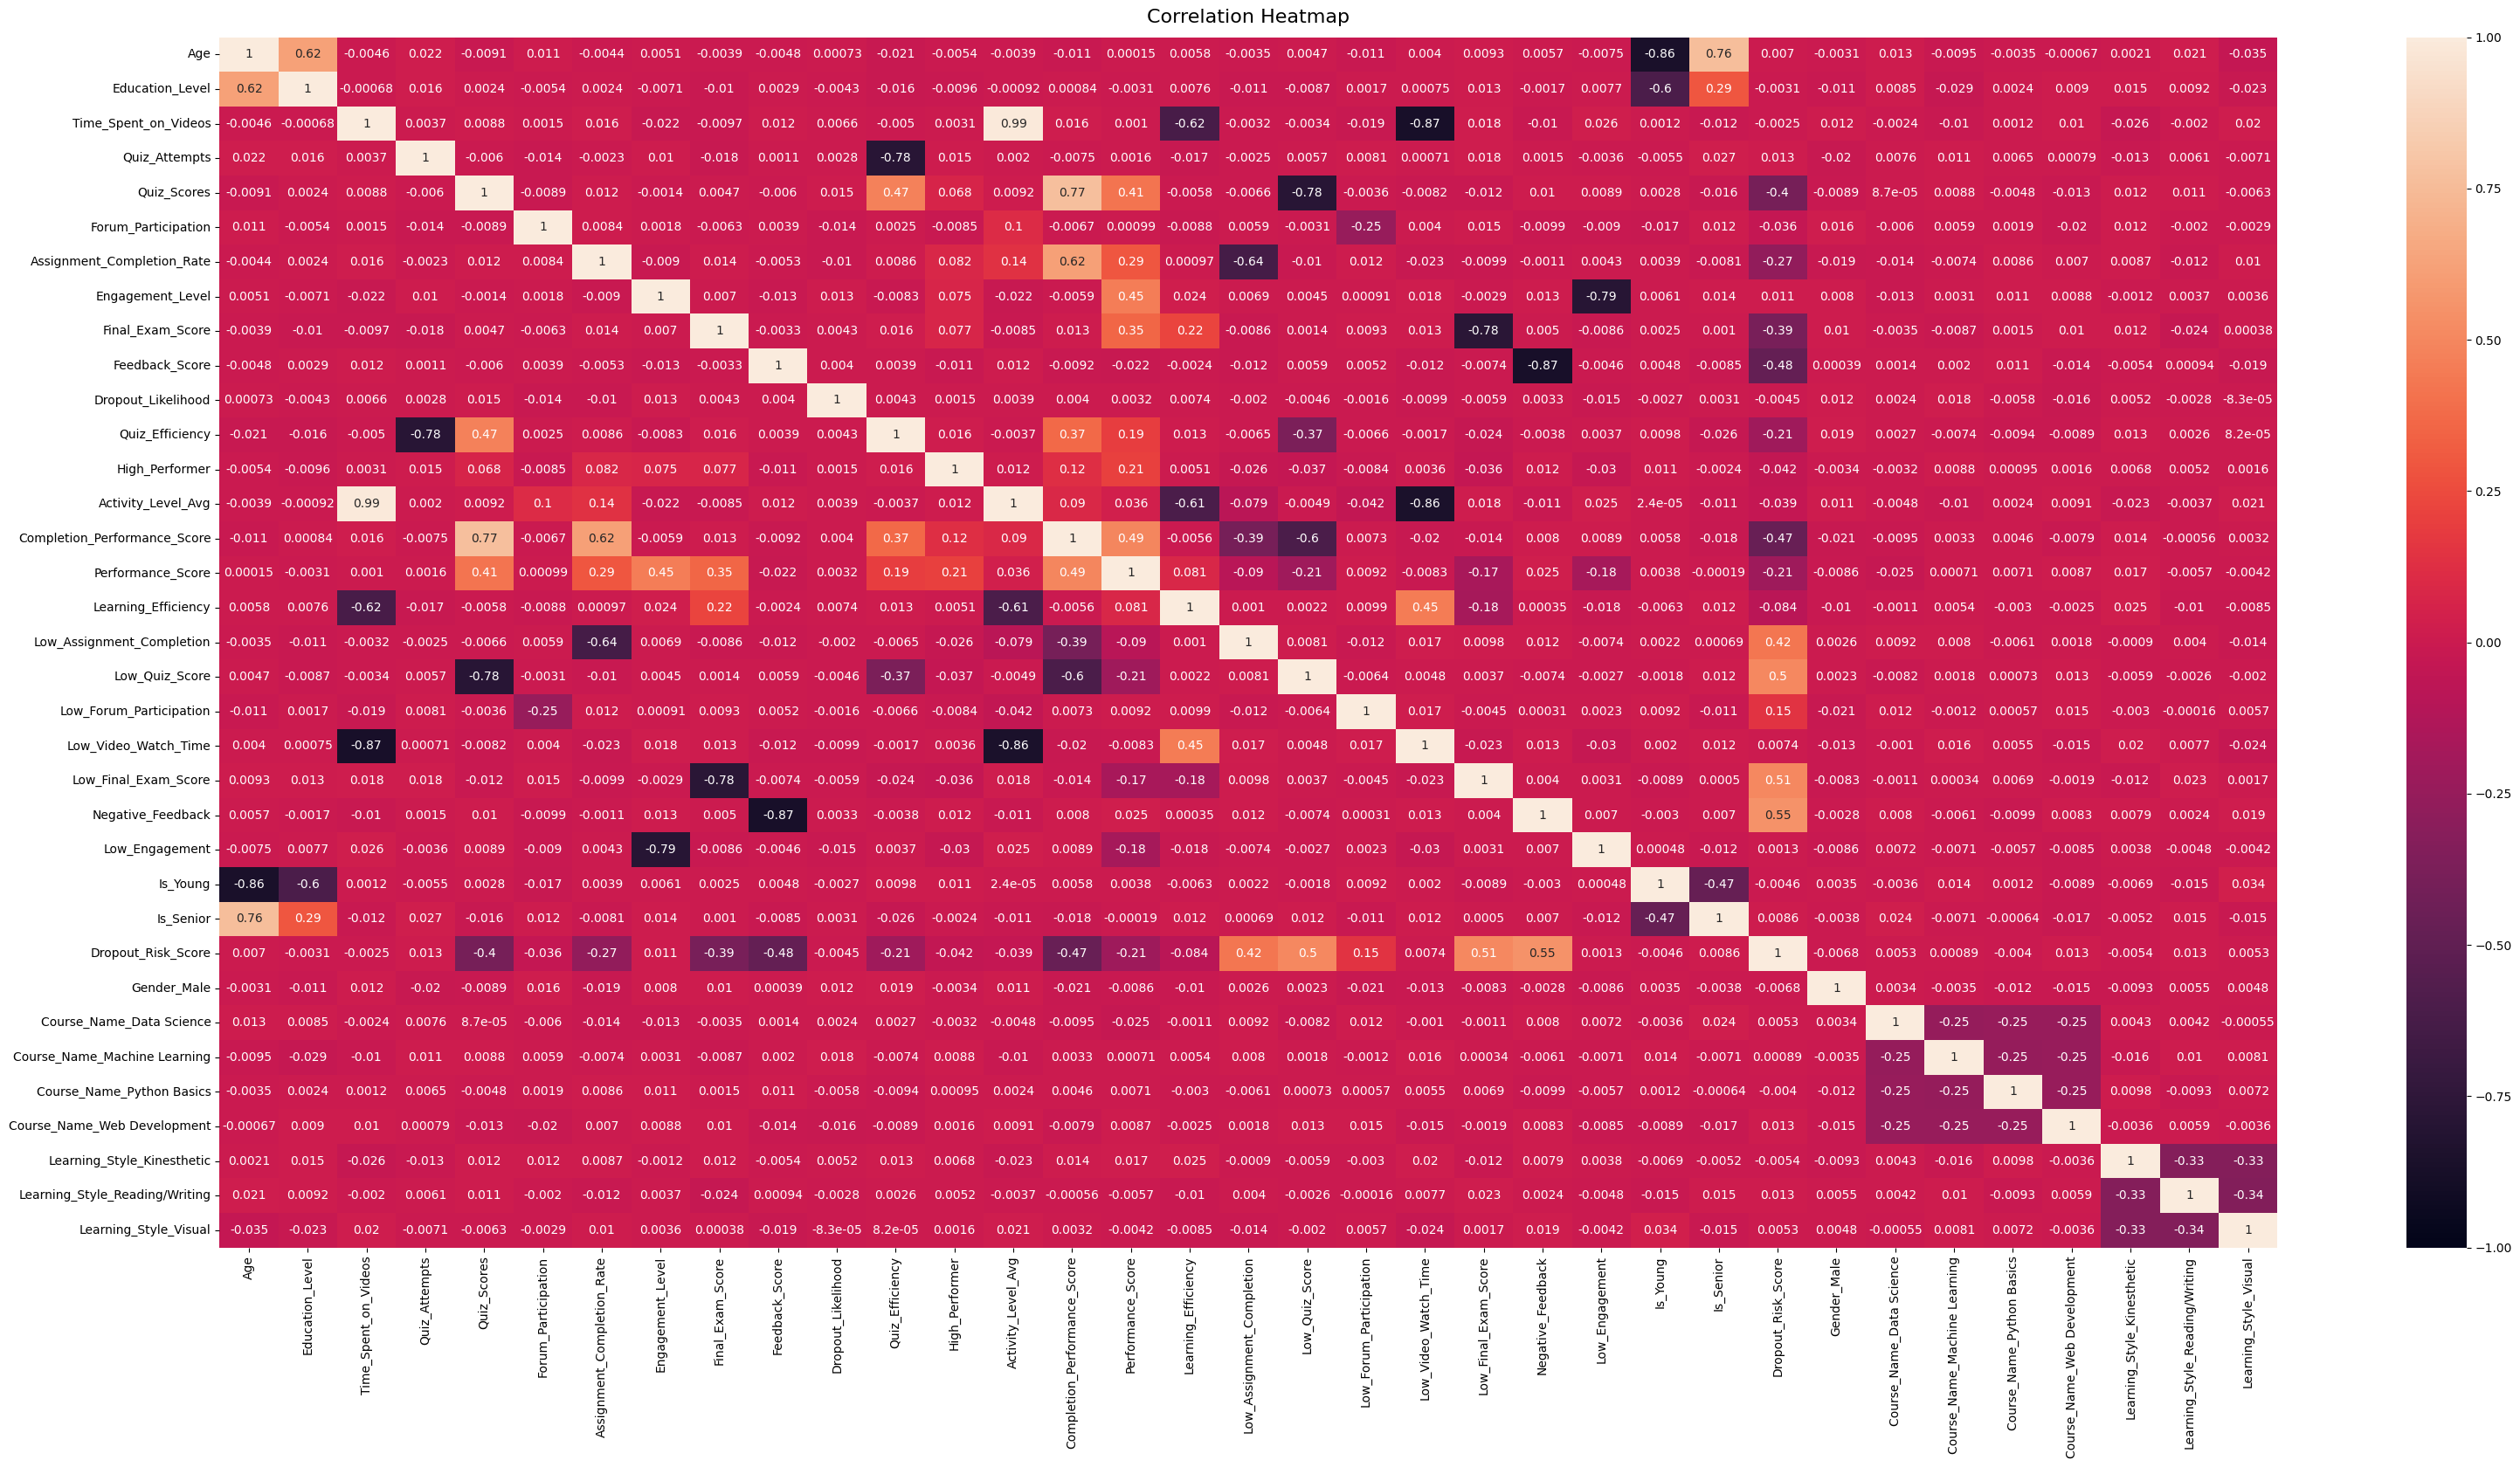

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(38, 18))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

In [ ]:
#Feature Selection
#(Age, Quiz_Scores, Forum_Participation, Assignment_Completion_Rate, Engagement_Level, Learning_Efficiency, Low_Video_Watch_Time
#Low_Final_Exam_Score, Low_Engagement, Is_Young, Is_Senior, Gender_Male, Course_Name_Data_Science, Course_Name_Machine_Learning,
#Course_Name_Python_Basics, Course_Name_Web_Development)

df=df.drop(['Quiz_Efficiency','High_Performer','Activity_Level_Avg', 'Completion_Performance_Score'],axis=1)
df=df.drop(['Low_Assignment_Completion', 'Low_Quiz_Score', 'Low_Forum_Participation'],axis=1)
df=df.drop(['Negative_Feedback','Dropout_Risk_Score'],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             10000 non-null  int64  
 1   Education_Level                 10000 non-null  float64
 2   Time_Spent_on_Videos            10000 non-null  int64  
 3   Quiz_Attempts                   10000 non-null  int64  
 4   Quiz_Scores                     10000 non-null  int64  
 5   Forum_Participation             10000 non-null  int64  
 6   Assignment_Completion_Rate      10000 non-null  int64  
 7   Engagement_Level                10000 non-null  float64
 8   Final_Exam_Score                10000 non-null  int64  
 9   Feedback_Score                  10000 non-null  int64  
 10  Dropout_Likelihood              10000 non-null  int64  
 11  Performance_Score               10000 non-null  int64  
 12  Learning_Efficiency             1

# 5.0 Data Modelling

<Axes: xlabel='Dropout_Likelihood', ylabel='count'>

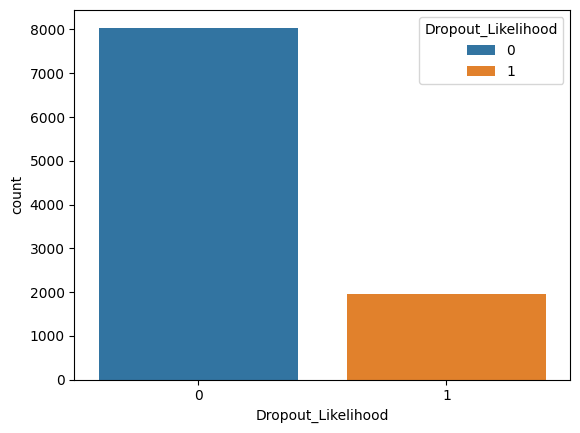

In [ ]:
#Check for Target Imbalance (Unbalanced Dataset)
df['Dropout_Likelihood'].value_counts()
sns.countplot(data=df, x='Dropout_Likelihood', hue='Dropout_Likelihood')

In [ ]:
#Define Predictor DF (x) and Target DF (y)
x=df.drop(['Dropout_Likelihood'],axis=1)
y=df['Dropout_Likelihood']

In [ ]:
#need to Train-Test Split first before apply SMOTE to avoid data leakage
from sklearn.model_selection import train_test_split

x_train_scaled, x_test_scaled,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [ ]:
#SMOTE for oversampling, to handle unbalanced dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_scaled, y_train = smote.fit_resample(x_train_scaled, y_train)


y.value_counts()

Dropout_Likelihood
0    8043
1    1957
Name: count, dtype: int64

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_scaled)
x_test_scaled = scaler.transform(x_test_scaled)

In [ ]:
# Do this right after scaling
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)
# saved feature columns during training
with open('feature_columns.pkl', 'wb') as f:
  pickle.dump(list(x_train_scaled.columns), f)

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both l1 and l2
}

# Set up the grid search
model = LogisticRegression(max_iter=1000)
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to training data
grid.fit(x_train_scaled, y_train)

# Best parameters and score
print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7591821228820841



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1609
           1       0.20      0.20      0.20       391

    accuracy                           0.69      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.69      0.69      0.69      2000

0.687
AUC-ROC Score: 0.5044149040165692


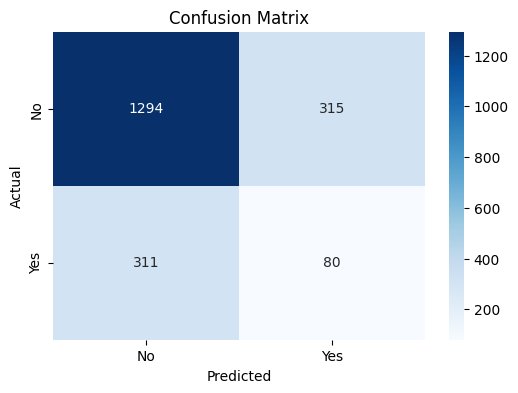

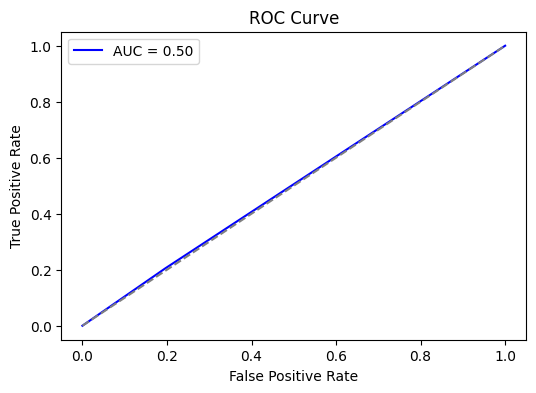

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    C=1,             # Regularization strength
    penalty='l1',      # Type of regularization
    solver='liblinear',# Solver that supports 'l1'
    max_iter=1000)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print("\nClassification Report:\n",classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", roc_auc)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#save model
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(model, f)

#Feature Importance
#importance = pd.Series(model.coef_[0], index=df)
#importance.sort_values().plot(kind='barh', title='Feature Importance (Logistic Coefficients)')
#plt.xlabel('Coefficient Value')
#plt.show()


##**Random Forest**


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1609
           1       0.25      0.02      0.03       391

    accuracy                           0.80      2000
   macro avg       0.53      0.50      0.46      2000
weighted avg       0.70      0.80      0.72      2000

0.7975
AUC-ROC Score: 0.5024256142319656


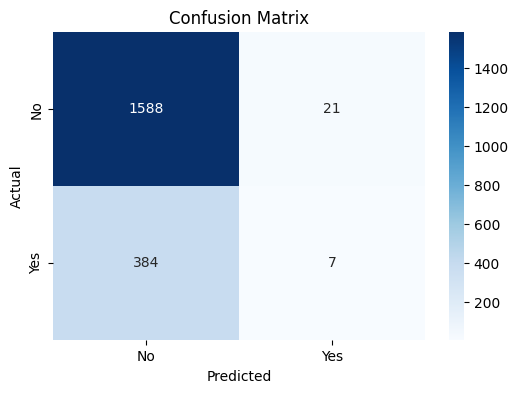

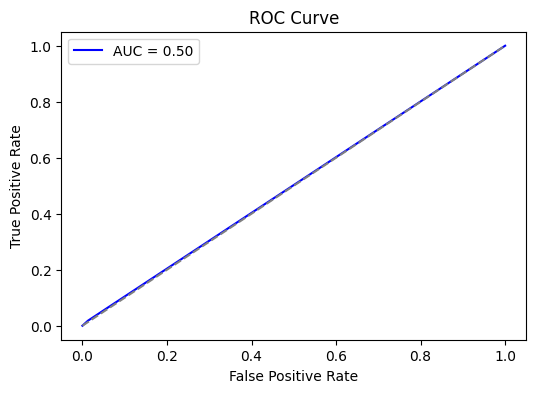

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)[:, 1]
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", roc_auc)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#save model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)

##**Gradient Boosting**


Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1609
           1       0.00      0.00      0.00       391

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

0.8045
AUC-ROC Score: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


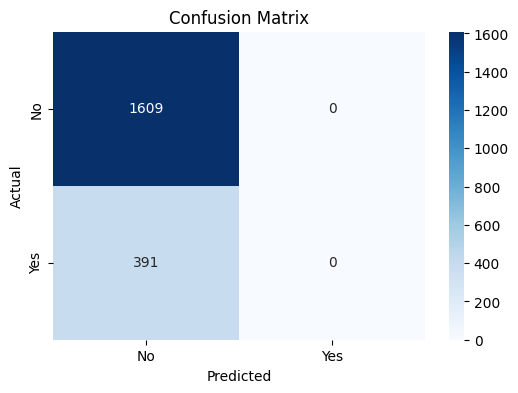

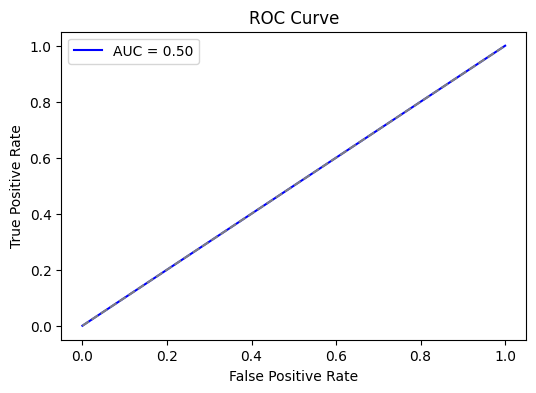

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)[:, 1]
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", roc_auc)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#save model
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

##**CatBoost Classifier**

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 8.6 MB/s eta 0:00:00

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      1609
           1       0.22      0.01      0.02       391

    accuracy                           0.80      2000
   macro avg       0.51      0.50      0.46      2000
weighted avg       0.69      0.80      0.72      2000

0.798
AUC-ROC Score: 0.5008003255345969


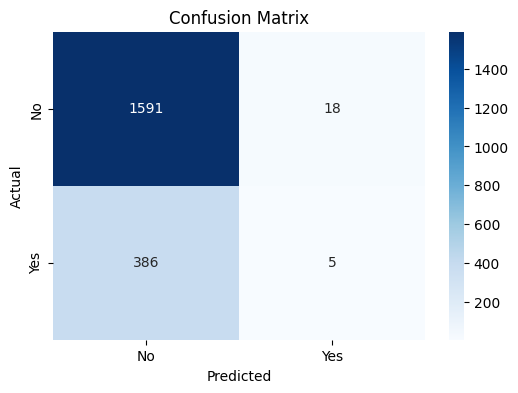

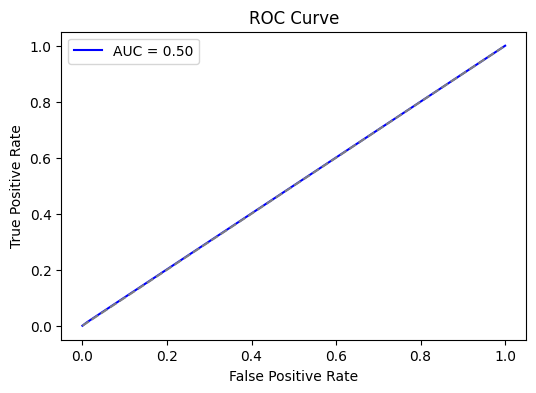

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)[:, 1]
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", roc_auc)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#save model
with open('cb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

<ipython-input-49-2546019532>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')


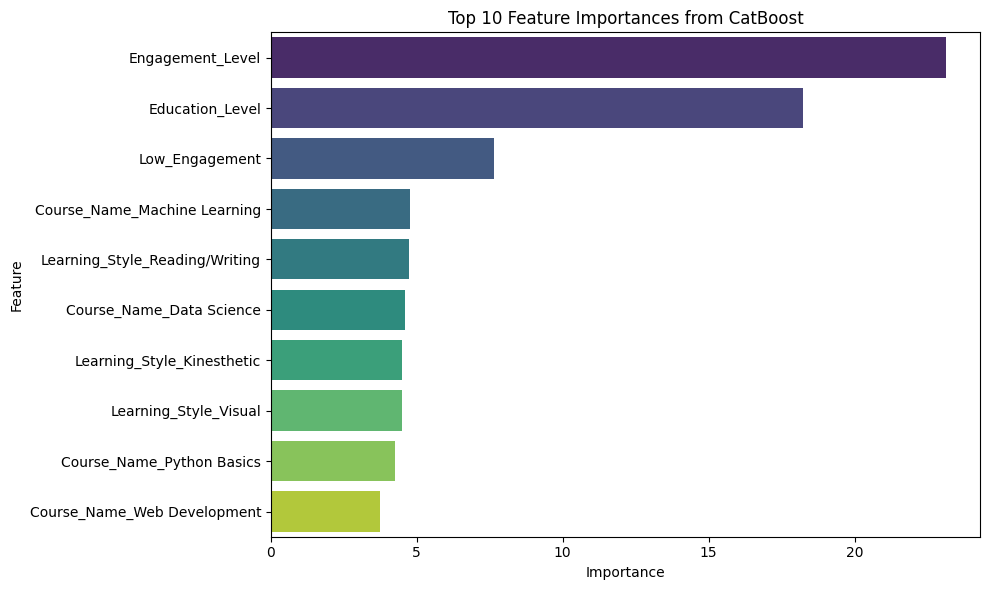

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.get_feature_importance()
feature_names = x_test_scaled.columns  # assuming x_train_scaled is a DataFrame

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances from CatBoost')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



üîç Validation Summary:

                 Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
0             CatBoost     0.798      0.217   0.013     0.024    0.511
1    Gradient Boosting     0.804      0.000   0.000     0.000    0.514
2  Logistic Regression     0.687      0.203   0.205     0.204    0.507
3        Random Forest     0.798      0.250   0.018     0.033    0.513


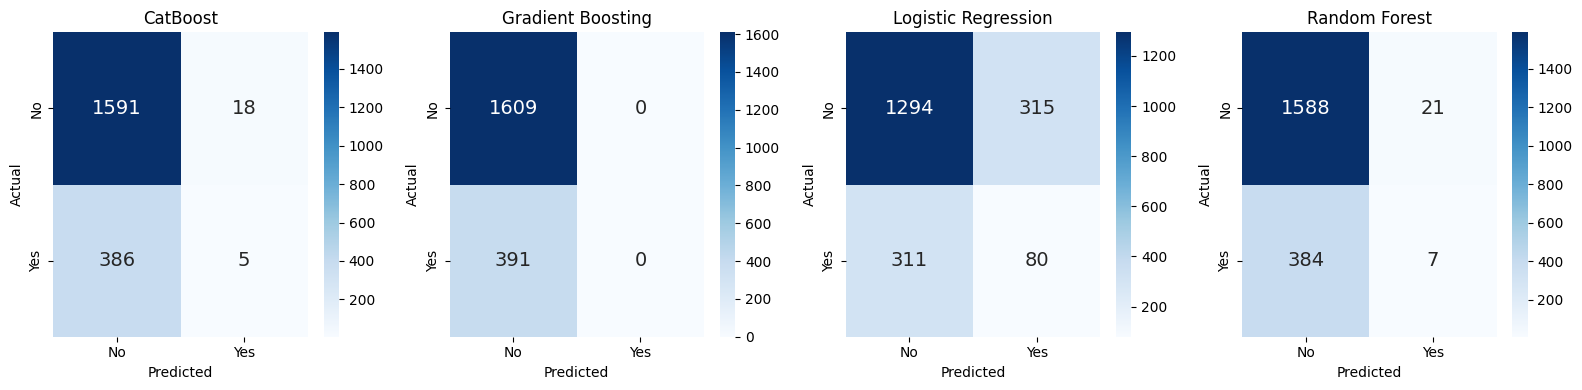

In [ ]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix
)

# Define model filenames
model_files = {
    "CatBoost": "cb_model.pkl",
    "Gradient Boosting": "gb_model.pkl",
    "Logistic Regression": "lr_model.pkl",
    "Random Forest": "rf_model.pkl"
}

# Prepare list to collect results
results = []
conf_matrices = {}

# Loop through each model
for name, file in model_files.items():
    with open(file, 'rb') as f:
        model = pickle.load(f)

    y_pred = model.predict(x_test_scaled)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test_scaled)[:, 1]
    else:
        y_proba = y_pred  # fallback if no probabilities

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": auc
    })

    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Create final DataFrame
df_results = pd.DataFrame(results)
df_results = df_results.round(3)
print("\nüîç Validation Summary:\n")
print(df_results)

# Optional: display confusion matrices
import seaborn as sns
import matplotlib.pyplot as plt


# Number of models
n_models = len(conf_matrices)

# Create subplots: 1 row, 4 columns (adjust figsize as needed)
fig, axes = plt.subplots(1, n_models, figsize=(4 * n_models, 4))

for ax, (name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax,annot_kws={"size": 14})
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


# 7.0 Data Product

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import OrdinalEncoder

# ----- App Configuration -----
#st.set_page_config(layout="wide", page_title="Dropout Predictor", initial_sidebar_state="expanded")

# ----- Caching for Performance -----
# This is a best practice. It loads a resource only once, making the app much faster.#

@st.cache_resource
def load_catboost_model(filename='cb_model.pkl'):
    """Loads the saved CatBoost model from its pickle file."""
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    return model

@st.cache_data
def load_feature_columns(filename='feature_columns.pkl'):
    """Loads the list of feature columns."""
    with open(filename, 'rb') as f:
        columns = pickle.load(f)
    return columns

# ----- Setup Encoders and Constants -----
# This code now runs ONLY ONCE when the app starts.

# 1. Load the required model and feature columns
model = load_catboost_model()
model_feature_columns = load_feature_columns()

# 2. Define the exact categories for the OrdinalEncoder
ordinal_categories = [
    ['High School', 'Undergraduate', 'Postgraduate'], # Categories for Education_Level
    ['Low', 'Medium', 'High']                       # Categories for Engagement_Level
]

# 3. Create and FIT the encoder ONCE
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
# We must fit it on a dummy dataframe that contains all possible categories
# so it knows the mapping (e.g., 'High School' -> 0, 'Undergraduate' -> 1)
dummy_data_for_fitting = pd.DataFrame({
    'Education_Level': ordinal_categories[0],
    'Engagement_Level': ordinal_categories[1]
})
ordinal_encoder.fit(dummy_data_for_fitting)


# ----- Preprocessing and Validation Functions -----

def preprocess_inputs(user_input, feature_cols, fitted_encoder):
    """
    Preprocesses user input to match the model's expected format.

    Args:
        user_input (dict): Raw input from Streamlit widgets.
        feature_cols (list): The list of columns the model was trained on.
        fitted_encoder (OrdinalEncoder): The pre-fitted ordinal encoder.
    """
    df = pd.DataFrame([user_input])

    # --- Your Custom Feature Engineering ---
    # This section is preserved from your original code
    df['Quiz_Efficiency'] = df['Quiz_Scores'] / df['Quiz_Attempts'].replace(0, 1) # Avoid division by zero
    df['Performance_Score'] = (
        (df['Assignment_Completion_Rate'] >= 90).astype(int) +
        (df['Quiz_Scores'] >= 80).astype(int) +
        (df['Final_Exam_Score'] >= 85).astype(int) +
        (df['Engagement_Level'] == 'High').astype(int) +
        (df['Feedback_Score'] >= 4).astype(int) # Assuming feedback is 1-5
    )
    df['High_Performer'] = (df['Performance_Score'] >= 4).astype(int)
    df['Learning_Efficiency'] = df['Final_Exam_Score'] / (df['Time_Spent_on_Videos'] + df['Quiz_Attempts'] + 1)
    df['Is_Young'] = (df['Age'] < 25).astype(int)
    df['Is_Senior'] = (df['Age'] >= 40).astype(int)

    # --- Encoding ---
    # CRITICAL FIX: Use the pre-fitted encoder to ONLY .transform() the data
    df[['Education_Level', 'Engagement_Level']] = fitted_encoder.transform(
        df[['Education_Level', 'Engagement_Level']]
    )

    # One-hot encode the remaining categorical columns
    df = pd.get_dummies(df, columns=['Gender', 'Course_Name', 'Learning_Style'], drop_first=True)

    # --- Final Alignment with Model Features ---
    # Ensure all required columns are present and in the correct order
    for col in feature_cols:
        if col not in df.columns:
            df[col] = 0
    df = df[feature_cols]

    return df

def validate_inputs(education_level, age):
    """Checks if the combination of inputs is valid."""
    if education_level == 'High School':
        if age < 13 or age > 17:
            return False, f"High School age must be between 13‚Äì17."
    elif education_level == 'Undergraduate':
        if age < 18:
            return False, f"Undergraduate requires age 18+."
    elif education_level == 'Postgraduate':
        if age < 21:
            return False, f"Postgraduate requires age 21+."
    return True, ""


# ----- Main Streamlit App -----

def main():
    st.title("üéì Student Dropout Likelihood Predictor")
    st.markdown("Fill in the student's information to predict their likelihood of dropping out.")
    st.divider()

    # --- Input Widgets ---
    col1, col2 = st.columns(2)

    with col1:
        st.subheader("üë§ Personal & Course Info")
        gender = st.segmented_control('**Gender**', ['Male', 'Female'], default='Male')
        education_level = st.radio(
            '**Education Level**',
            ['High School', 'Undergraduate', 'Postgraduate']
        )

        # **Now, set the age parameters dynamically based on the selection above**
        if education_level == 'High School':
            min_age = 13
            max_age = 17
            default_age = 13
            help_text = "Age is restricted to the typical range for high school students."
        elif education_level == 'Undergraduate':
            min_age = 18
            max_age = 50
            default_age = 18
            help_text = "Age is set for undergraduate students."
        elif education_level == 'Postgraduate':
            min_age = 18
            max_age = 50
            default_age = 18
            help_text = "Age is set for postgraduate students."
        else:
            min_age = 13
            max_age = 50
            default_age = 20
            help_text = "Select an education level."


        # **Finally, render the Age input with the dynamic parameters**
        age = st.slider(
            '**Age**',
            min_value=min_age,
            max_value=max_age,
            value=default_age, # Use the dynamic default value
            help=help_text
        )

        course_name = st.selectbox('**Course Name**', ['Cybersecurity', 'Data Science', 'Machine Learning', 'Python Basics', 'Web Development'])
        learning_style = st.selectbox('**Learning Style**', ['Auditory', 'Kinesthetic', 'Reading/Writing', 'Visual'])

    with col2:
        st.subheader("üìà Activity & Performance")
        time_spent_on_videos = st.number_input('**Time on Videos (mins)**', min_value=0, max_value=1000, value=100)
        engagement_level = st.selectbox('**Engagement Level**', ['Low', 'Medium', 'High'])
        feedback_score = st.radio("**Feedback Score ‚≠ê**", options=[1, 2, 3, 4, 5], index=3, horizontal=True)
        forum_participation = st.number_input('**Forum Posts**', min_value=0, max_value=100, value=3)
        quiz_attempts = st.slider('**Quiz Attempts**', min_value=1, max_value=4, value=2)
        quiz_scores = st.slider('**Average Quiz Score**', min_value=0, max_value=100, value=80)
        assignment_completion_rate = st.slider('**Assignment Completion (%)**', min_value=0, max_value=100, value=90)
        final_exam_score = st.slider('**Final Exam Score**', min_value=0, max_value=100, value=85)

    st.divider()

    # --- The Validation Gate ---
    is_valid, error_message = validate_inputs(education_level, age)
    #st.write("DEBUG: Validation result ‚Üí", is_valid, error_message)
    button_clicked = st.button('**Predict Dropout Likelihood**', use_container_width=True, type="primary")

    if button_clicked:
        if not is_valid:
            st.error("Invalid input combination. Please check Education Level and Age again.", icon="üö®")
            return
        else:
            user_input = {
                'Age': age, 'Gender': gender, 'Education_Level': education_level,
                'Course_Name': course_name, 'Time_Spent_on_Videos': time_spent_on_videos,
                'Quiz_Attempts': quiz_attempts, 'Quiz_Scores': quiz_scores,
                'Forum_Participation': forum_participation,
                'Assignment_Completion_Rate': assignment_completion_rate,
                'Engagement_Level': engagement_level, 'Final_Exam_Score': final_exam_score,
                'Learning_Style': learning_style, 'Feedback_Score': feedback_score
            }

            processed_df = preprocess_inputs(user_input, model_feature_columns, ordinal_encoder)
            prediction = model.predict(processed_df)[0]
            proba = model.predict_proba(processed_df)[0]

            if prediction == 1:
                st.error(f"**Prediction: High Likelihood of Dropout** (Confidence: {proba[1]:.0%})", icon="‚ö†Ô∏è")
            else:
                st.success(f"**Prediction: Low Likelihood of Dropout** (Confidence: {proba[0]:.0%})", icon="‚úÖ")


if __name__ == '__main__':
    main()

Writing app.py


In [ ]:
!pip install -q streamlit pyngrok gdown

# Authenticate ngrok using Colab Secrets
from google.colab import userdata
from pyngrok import ngrok

try:
    authtoken = userdata.get('NGROK_AUTH_TOKEN')
    ngrok.set_auth_token(authtoken)
    print("‚úÖ ngrok authenticated successfully using Colab Secret.")
except Exception as e:
    print("‚ùå ERROR: Could not authenticate ngrok. Make sure you have added a Colab Secret named 'NGROK_AUTH_TOKEN' and enabled 'Notebook access'.")
    raise e

# Run the Streamlit app in the background
!nohup streamlit run app.py &

# Use pyngrok to create a public tunnel
public_url = ngrok.connect(8501)
print("üéâ Your Streamlit app is live at:")
print(public_url)

‚úÖ ngrok authenticated successfully using Colab Secret.
nohup: appending output to 'nohup.out'
üéâ Your Streamlit app is live at:
NgrokTunnel: "https://106a-34-86-110-183.ngrok-free.app" -> "http://localhost:8501"
